In [1]:
import satpy

In [6]:
NATIVE_FILENAME = "/mnt/solar-pv-nowcasting-data/satellite/EUMETSAT/SEVIRI_RSS/native/2020/06/01/12/04/MSG3-SEVI-MSG15-0100-NA-20200601120416.752000000Z-NA.nat"

In [2]:
satpy.available_readers()

['abi_l1b',
 'abi_l1b_scmi',
 'abi_l2_nc',
 'acspo',
 'agri_l1',
 'ahi_hrit',
 'ahi_hsd',
 'ahi_l1b_gridded_bin',
 'ami_l1b',
 'amsr2_l1b',
 'amsr2_l2',
 'amsr2_l2_gaasp',
 'amsub_l1c_aapp',
 'avhrr_l1b_aapp',
 'avhrr_l1b_eps',
 'avhrr_l1b_hrpt',
 'avhrr_l1c_eum_gac_fdr_nc',
 'cmsaf-claas2_l2_nc',
 'electrol_hrit',
 'fci_l1c_nc',
 'fci_l2_nc',
 'generic_image',
 'geocat',
 'glm_l2',
 'goes-imager_hrit',
 'goes-imager_nc',
 'gpm_imerg',
 'hy2_scat_l2b_h5',
 'iasi_l2',
 'jami_hrit',
 'maia',
 'mersi2_l1b',
 'mhs_l1c_aapp',
 'mimicTPW2_comp',
 'mirs',
 'mtsat2-imager_hrit',
 'mviri_l1b_fiduceo_nc',
 'nucaps',
 'nwcsaf-geo',
 'nwcsaf-msg2013-hdf5',
 'nwcsaf-pps_nc',
 'olci_l1b',
 'olci_l2',
 'omps_edr',
 'safe_sar_l2_ocn',
 'satpy_cf_nc',
 'seviri_l1b_hrit',
 'seviri_l1b_native',
 'seviri_l1b_nc',
 'slstr_l1b',
 'slstr_l2',
 'smos_l2_wind',
 'tropomi_l2',
 'vaisala_gld360',
 'vii_l1b_nc',
 'vii_l2_nc',
 'viirs_compact',
 'viirs_edr_active_fires',
 'viirs_l1b',
 'viirs_sdr',
 'virr_l1b']

In [35]:
%%time
scene = satpy.Scene(reader="seviri_l1b_native", filenames=[NATIVE_FILENAME])

CPU times: user 68.3 ms, sys: 4.56 ms, total: 72.8 ms
Wall time: 522 ms


In [36]:
scene.load(["HRV"])

In [37]:
scene["HRV"]

/home/jack/miniconda3/envs/zarr/lib/python3.9/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


<xarray.DataArray 'reshape-420ba234fe34910f8287a0f890cc932f' (y: 4176, x: 5568)>
dask.array<mul, shape=(4176, 5568), dtype=float32, chunksize=(1392, 5568), chunktype=numpy.ndarray>
Coordinates:
    acq_time  (y) datetime64[ns] NaT NaT NaT NaT NaT NaT ... NaT NaT NaT NaT NaT
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 1.395e+06 1.396e+06 1.397e+06 ... 5.57e+06 5.571e+06
  * x         (x) float64 2.824e+06 2.823e+06 ... -2.742e+06 -2.743e+06
Attributes:
    orbital_parameters:                     {'projection_longitude': 9.5, 'pr...
    sun_earth_distance_correction_applied:  True
    sun_earth_distance_correction_factor:   1.0282367454433767
    units:                                  %
    wavelength:                             0.7 µm (0.5-0.9 µm)
    standard_name:                          toa_bidirectional_reflectance
    platform_name:                          Meteosat-10
    sensor:                                 seviri
    georef_offset_corrected:                True
    start_time:                             2020-06-01 12:00:10.306957
    end_time:                               2020-06-01 12:05:10.242182
    reader:                                 seviri_l1b_native
    area:                                   Area ID: msg_seviri_rss_1km\nDesc...
    name:                                   HRV
    resolution:                             1000.134348869
    calibration:                            reflectance
    modifiers:                              ()
    _satpy_id:                              DataID(name='HRV', wavelength=Wav...
    ancillary_variables:                    []

In [38]:
scene = scene.crop(ll_bbox=(-16, 45, 10, 62))

/home/jack/miniconda3/envs/zarr/lib/python3.9/site-packages/pyresample/spherical.py:118: RuntimeWarning: invalid value encountered in true_divide
  self.cart /= np.sqrt(np.einsum('...i, ...i', self.cart, self.cart))


In [39]:
area = scene["HRV"].attrs["area"]

In [40]:
area

/home/jack/miniconda3/envs/zarr/lib/python3.9/site-packages/pyproj/crs/crs.py:1256: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  return self._crs.to_proj4(version=version)


Area ID: msg_seviri_rss_1km
Description: MSG SEVIRI Rapid Scanning Service area definition with 1 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '9.5', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 1843
Number of rows: 891
Area extent: (28503.8289, 5088183.4999, -1814743.776, 4197063.795)

In [41]:
%%time
lon, lat = area.get_lonlats()

CPU times: user 431 ms, sys: 15 ms, total: 446 ms
Wall time: 445 ms


In [42]:
lon.shape

(891, 1843)

In [43]:
lat

array([[44.27026803, 44.27025558, 44.27024358, ..., 45.08506448,
        45.08605768, 45.08705167],
       [44.28539528, 44.28538281, 44.2853708 , ..., 45.10097367,
        45.10196792, 45.10296295],
       [44.30052846, 44.30051599, 44.30050397, ..., 45.11689012,
        45.11788541, 45.11888149],
       ...,
       [61.86742923, 61.86738551, 61.86734338, ..., 66.44589956,
        66.45969722, 66.47362154],
       [61.8964632 , 61.89641936, 61.89637712, ..., 66.51099972,
        66.52516021, 66.5394563 ],
       [61.9255421 , 61.92549814, 61.92545579, ..., 66.57723785,
        66.5917876 , 66.60648301]])

In [76]:
ds = scene.to_xarray_dataset()

In [77]:
#ds = ds.rename({'x': 'x_coords_orig_geostationary', 'y': 'y_coords_orig_geostationary'})

In [49]:
import pyproj

In [50]:
lat_lon_to_osgb = pyproj.Transformer.from_crs(crs_from=4326, crs_to=27700)

In [56]:
ds

<xarray.Dataset>
Dimensions:   (y: 891, x: 1843)
Coordinates:
    acq_time  (y) datetime64[ns] 2020-06-01T12:02:57.707000 ... 2020-06-01T12...
    crs       object PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["unknown",...
  * y         (y) float64 4.198e+06 4.199e+06 4.2e+06 ... 5.087e+06 5.088e+06
  * x         (x) float64 2.8e+04 2.7e+04 2.6e+04 ... -1.813e+06 -1.814e+06
Data variables:
    HRV       (y, x) float32 dask.array<chunksize=(891, 1843), meta=np.ndarray>
Attributes: (12/19)
    orbital_parameters:                     {'projection_longitude': 9.5, 'pr...
    sun_earth_distance_correction_applied:  True
    sun_earth_distance_correction_factor:   1.0282367454433767
    units:                                  %
    wavelength:                             0.7 µm (0.5-0.9 µm)
    standard_name:                          toa_bidirectional_reflectance
    ...                                     ...
    name:                                   HRV
    resolution:                             1000.134348869
    calibration:                            reflectance
    modifiers:                              ()
    _satpy_id:                              DataID(name='HRV', wavelength=Wav...
    ancillary_variables:                    []

In [58]:
%%time
x_osgb, y_osgb = lat_lon_to_osgb.transform(lat, lon)

CPU times: user 612 ms, sys: 3.3 ms, total: 615 ms
Wall time: 612 ms


In [80]:
ds = ds.assign_coords(
    x_osgb=(('y', 'x'), x_osgb),
    y_osgb=(('y', 'x'), y_osgb),
)

In [73]:
import numpy as np

In [74]:
np.save("x_osgb", x_osgb)
np.save("y_osgb", y_osgb)

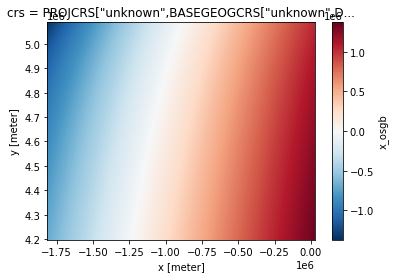

In [81]:
ds.x_osgb.plot();

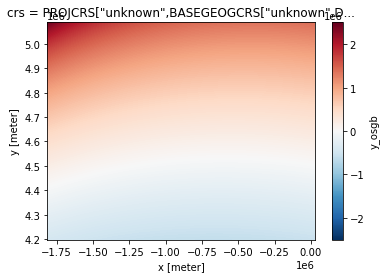

In [82]:
ds.y_osgb.plot();

In [68]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

/tmp/ipykernel_178221/2817598920.py:2: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  ax = plt.axes(projection=ccrs.OSGB())
/tmp/ipykernel_178221/2817598920.py:6: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  transform=ccrs.OSGB(),


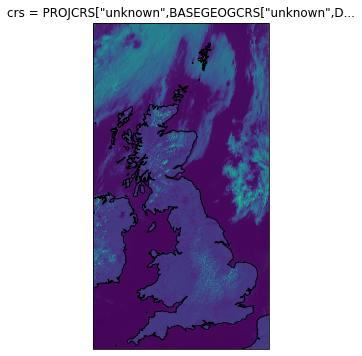

In [71]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.OSGB())

ds["HRV"].plot.pcolormesh(
    ax=ax, 
    transform=ccrs.OSGB(), 
    x="x_osgb", 
    y="y_osgb", 
    add_colorbar=False,
)
ax.coastlines()